<a href="https://colab.research.google.com/github/sonheachang/sonheachang/blob/main/pytorch_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import cv2, torch
from google.colab.patches import cv2_imshow

In [16]:
# Check whether GPU is available or not
print(torch.cuda.is_available())
!nvidia-smi

True
Thu Nov 20 07:55:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             26W /   70W |     588MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+

In [17]:
# Load the YOLOv5 model from the Pytorch Hub (https://pytorch.org/hub/)
yolov5 = torch.hub.load('ultralytics/yolov5', 'yolov5l', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-11-20 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients, 109.0 GFLOPs
Adding AutoShape... 


In [18]:
# Download an image from internet
!wget -c 'https://dimg.donga.com/wps/NEWS/IMAGE/2014/11/26/68179447.1.jpg' -O 'test.jpg'

--2025-11-20 07:55:20--  https://dimg.donga.com/wps/NEWS/IMAGE/2014/11/26/68179447.1.jpg
Resolving dimg.donga.com (dimg.donga.com)... 1.248.254.68, 1.248.254.84, 1.248.254.70
Connecting to dimg.donga.com (dimg.donga.com)|1.248.254.68|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



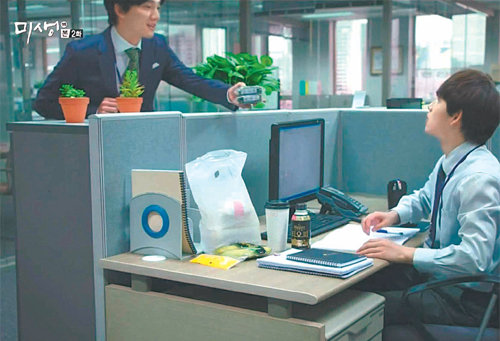

In [19]:
# Load an image on internet
image = cv2.imread('test.jpg')
cv2_imshow(image)

In [20]:
# Detect objects on the image using the YOLO
results = yolov5(image)
objects = results.xyxyn[0].detach().cpu().numpy()

# Rescale object locations
h, w, _ = image.shape
objects[:,0:4] = objects[:,0:4] * [w, h, w, h]

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


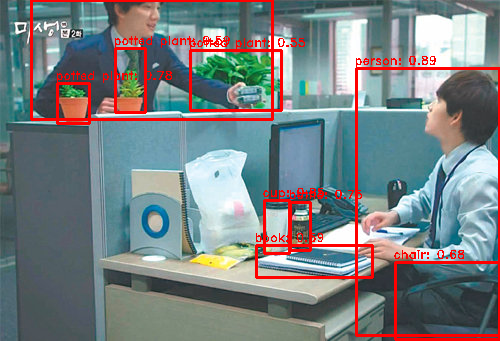

In [21]:
# Show the image with results
classes = [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
            'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
            'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
            'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle',
            'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
            'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
            'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
            'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush' ]
for obj in objects:
    if obj[-2] > 0.5: # More than 0.5 confidence
        tl, br = obj[0:2].astype('int'), obj[2:4].astype('int')
        cv2.rectangle(image, tuple(tl), tuple(br), (0, 0, 255), 2)
        cv2.putText(image, f'{classes[int(obj[-1])]}: {obj[-2]:.2f}', tuple(tl + (-2, -4)), cv2.FONT_HERSHEY_DUPLEX, 0.4, (0, 0, 255))
cv2_imshow(image)